# Lift, Gain and Decile Analysis
Vinicius Trevisan - 2022

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Create synthetic dataset

In [3]:
# Parameters for the synthetic data
scale = 5 # Scatter
size = 1000 # Size for each class

In [4]:
# Generate two classes out of normal distributions - good classifier
class1_good_x = np.random.normal(loc = 10, scale = 1, size = size)
class1_good_y = np.random.normal(loc = 1, scale = 1, size = size)

class2_good_x = np.random.normal(loc = 1, scale = 1, size = size)
class2_good_y = np.random.normal(loc = 5, scale = 1, size = size)

df_class1 = pd.DataFrame({'x' : class1_good_x, 'y' : class1_good_y, 'class': 0})
df_class2 = pd.DataFrame({'x' : class2_good_x, 'y' : class2_good_y, 'class': 1})
df_good = df_class1.append(df_class2, ignore_index = True)

<AxesSubplot:xlabel='x', ylabel='y'>

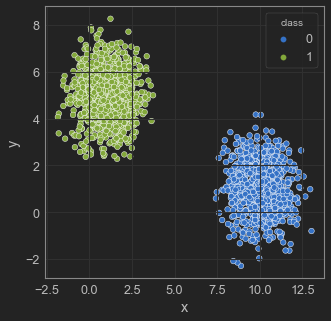

In [5]:
# Plot both to show how much they intersect
plt.figure(figsize=(5, 5))
sns.scatterplot(data = df_good, x = 'x', y = 'y', hue = 'class')

In [6]:
# Generate two classes out of normal distributions - medium classifier
class1_medium_x = np.random.normal(loc = 10, scale = 5, size = size)
class1_medium_y = np.random.normal(loc = 1, scale = 5, size = size)

class2_medium_x = np.random.normal(loc = 1, scale = 5, size = size)
class2_medium_y = np.random.normal(loc = 5, scale = 5, size = size)

df_class1 = pd.DataFrame({'x' : class1_medium_x, 'y' : class1_medium_y, 'class': 0})
df_class2 = pd.DataFrame({'x' : class2_medium_x, 'y' : class2_medium_y, 'class': 1})
df_medium = df_class1.append(df_class2, ignore_index = True)

<AxesSubplot:xlabel='x', ylabel='y'>

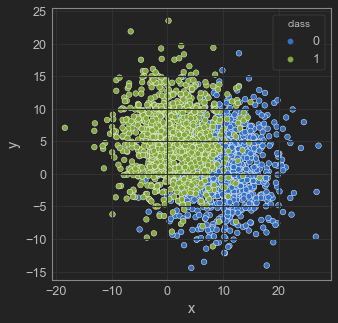

In [7]:
# Plot both to show how much they intersect
plt.figure(figsize=(5, 5))
sns.scatterplot(data = df_medium, x = 'x', y = 'y', hue = 'class')

In [8]:
# Generate two classes out of normal distributions - medium classifier
class1_bad_x = np.random.normal(loc = 10, scale = 5, size = size)
class1_bad_y = np.random.normal(loc = 1, scale = 5, size = size)

class2_bad_x = class1_bad_x + np.random.normal(loc = 1, scale = 1, size = size)
class2_bad_y = class1_bad_y + np.random.normal(loc = 1, scale = 1, size = size)

df_class1 = pd.DataFrame({'x' : class1_bad_x, 'y' : class1_bad_y, 'class': 0})
df_class2 = pd.DataFrame({'x' : class2_bad_x, 'y' : class2_bad_y, 'class': 1})
df_bad = df_class1.append(df_class2, ignore_index = True)

<AxesSubplot:xlabel='x', ylabel='y'>

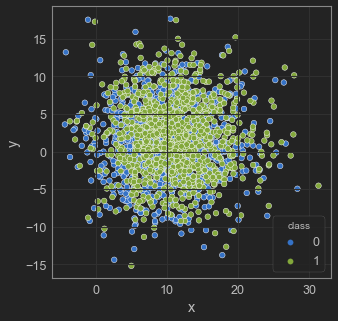

In [9]:
# Plot both to show how much they intersect
plt.figure(figsize=(5, 5))
sns.scatterplot(data = df_bad, x = 'x', y = 'y', hue = 'class')

Text(0.5, 1.0, 'Bad')

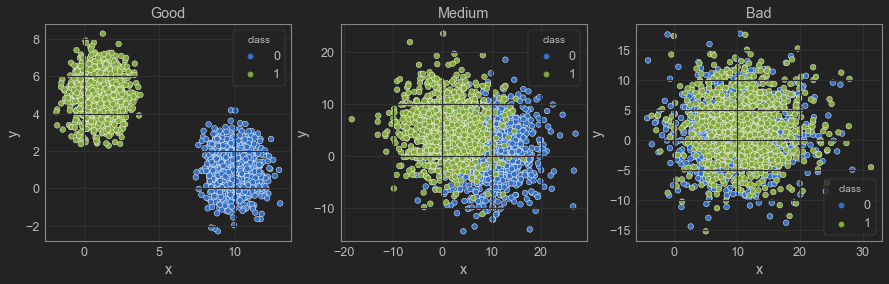

In [10]:
# Plot all three
fig = plt.figure(figsize = (15, 4))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(data = df_good, x = 'x', y = 'y', hue = 'class', ax = ax1)
sns.scatterplot(data = df_medium, x = 'x', y = 'y', hue = 'class', ax = ax2)
sns.scatterplot(data = df_bad, x = 'x', y = 'y', hue = 'class', ax = ax3)
ax1.set_title("Good")
ax2.set_title("Medium")
ax3.set_title("Bad")

## Fit a simple classifier for each example
In this case, the default instance of the Naïve Bayes classifier will be used, but really any other can also be used

In [11]:
model_object = GaussianNB
# model_object = RandomForestClassifier
# model_object = XGBClassifier

In [12]:
X_good, y_good = df_good.drop(columns = ["class"]), df_good["class"]
X_medium, y_medium = df_medium.drop(columns = ["class"]), df_medium["class"]
X_bad, y_bad = df_bad.drop(columns = ["class"]), df_bad["class"]

In [13]:
# Splits the datasets
X_good_train, X_good_test, y_good_train, y_good_test = train_test_split(X_good, y_good, test_size = 0.25)
X_medium_train, X_medium_test, y_medium_train, y_medium_test = train_test_split(X_medium, y_medium, test_size = 0.25)
X_bad_train, X_bad_test, y_bad_train, y_bad_test = train_test_split(X_bad, y_bad, test_size = 0.25)

In [14]:
# Create the model object
model_good = model_object()
# Fit the model to the training data
model_good.fit(X_good_train, y_good_train)
# Predict the classes on the test data
y_pred_good = model_good.predict(X_good_test)
# Predict the classes on the test data, and return the probabilities for each class
y_proba_good = model_good.predict_proba(X_good_test)

In [15]:
# Create the model object
model_medium = model_object()
# Fit the model to the training data
model_medium.fit(X_medium_train, y_medium_train)
# Predict the classes on the test data
y_pred_medium = model_medium.predict(X_medium_test)
# Predict the classes on the test data, and return the probabilities for each class
y_proba_medium = model_medium.predict_proba(X_medium_test)

In [16]:
# Create the model object
model_bad = model_object()
# Fit the model to the training data
model_bad.fit(X_bad_train, y_bad_train)
# Predict the classes on the test data
y_pred_bad = model_bad.predict(X_bad_test)
# Predict the classes on the test data, and return the probabilities for each class
y_proba_bad = model_bad.predict_proba(X_bad_test)

<AxesSubplot:ylabel='Count'>

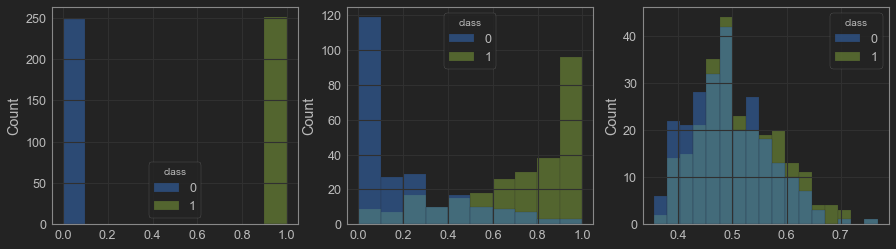

In [17]:
fig = plt.figure(figsize = (15, 4))
sns.histplot(x = y_proba_good[:, 1], hue = y_good_test, ax = plt.subplot(1, 3, 1))
sns.histplot(x = y_proba_medium[:, 1], hue = y_medium_test, ax = plt.subplot(1, 3, 2))
sns.histplot(x = y_proba_bad[:, 1], hue = y_bad_test, ax = plt.subplot(1, 3, 3))

## Lift

In [273]:
def plot_lift(y_real, y_proba, ax = None, color = 'b', title = 'Lift Curve'):
    # Prepare the data
    aux_df = pd.DataFrame()
    aux_df['y_real'] = y_real
    aux_df['y_proba'] = y_proba
    # Sort by predicted probability
    aux_df = aux_df.sort_values('y_proba', ascending = False)
    # Find the total positive ratio of the whole dataset
    total_positive_ratio = sum(aux_df['y_real'] == 1) / aux_df.shape[0]
    # For each line of data, get the ratio of positives of the given subset and calculate the lift
    lift_values = []
    for i in aux_df.index:
        threshold = aux_df.loc[i]['y_proba']
        subset = aux_df[aux_df['y_proba'] >= threshold]
        subset_positive_ratio = sum(subset['y_real'] == 1) / subset.shape[0]
        lift = subset_positive_ratio / total_positive_ratio
        lift_values.append(lift)
    # Plot the lift curve
    if ax == None:
        ax = plt.axes()
    ax.set_xlabel('Proportion of sample')
    ax.set_ylabel('Lift')
    ax.set_title(title)
    sns.lineplot(x = [x/len(lift_values) for x in range(len(lift_values))], y = lift_values, ax = ax, color = color)
    ax.axhline(1, color = 'gray', linestyle = 'dashed', linewidth = 3)

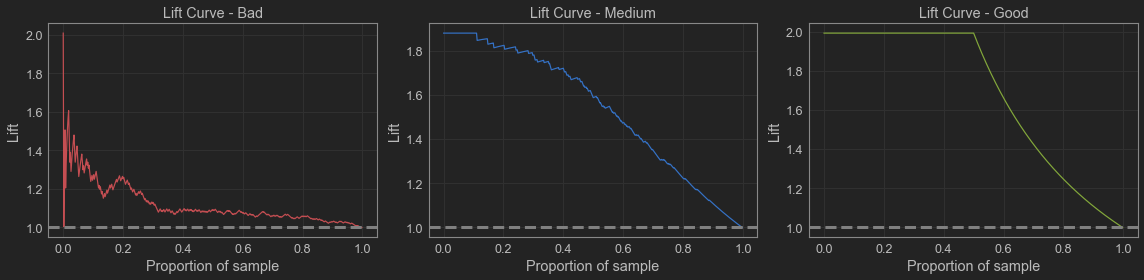

In [274]:
plt.figure(figsize = (16,4))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
plot_lift(y_bad_test, y_proba_bad[:, 1], ax = ax1, color = 'r', title = "Lift Curve - Bad")
plot_lift(y_medium_test, y_proba_medium[:, 1], ax = ax2, color = 'b', title = "Lift Curve - Medium")
plot_lift(y_good_test, y_proba_good[:, 1], ax = ax3, color = 'g', title = "Lift Curve - Good")
plt.tight_layout()

## Decile

### Create Synthetic Dataset

In [55]:
import math

In [56]:
x = [x/10 for x in range(100)]

In [255]:
y = [0.01 + 1/(1+15*math.exp(1.5*(xi-3)))for xi in x]
y = [yi/sum(y) for yi in y]

<AxesSubplot:>

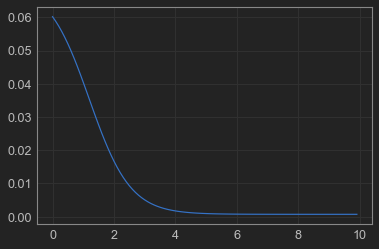

In [256]:
sns.lineplot(x = x, y = y)

In [257]:
product_profit = pd.DataFrame({"product": list(range(100)), "profit_percent": y}).sample(frac=1).reset_index()

In [258]:
product_profit.head()

,index,product,profit_percent
0,62,62,0.000732
1,75,75,0.000700
2,41,41,0.001572
3,1,1,0.058859
4,15,15,0.027593


### Decile Analysis

In [259]:
product_profit = product_profit.sort_values("profit_percent", ascending = False)

In [260]:
product_profit["decile"] = pd.qcut(product_profit["profit_percent"], q = 10, labels = list(range(10, 0, -1)))

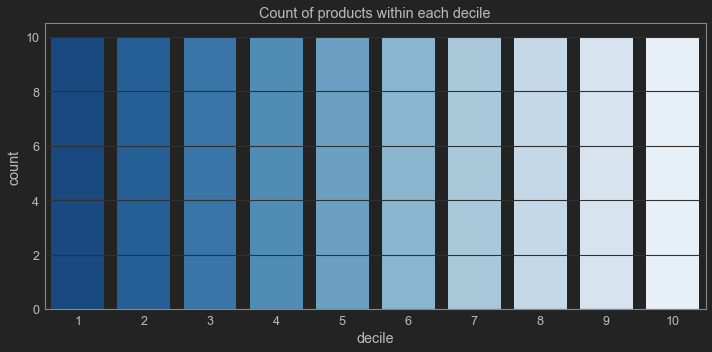

In [261]:
plt.figure(figsize = (10,5))
sns.countplot(x = "decile", data = product_profit, order = range(1, 11), palette = 'Blues_r')
plt.title("Count of products within each decile")
plt.tight_layout()

In [262]:
product_profit[["product", "decile"]].groupby("decile").count().reset_index()

,decile,product
0,10,10
1,9,10
2,8,10
3,7,10
4,6,10
5,5,10
6,4,10
7,3,10
8,2,10
9,1,10


In [263]:
grp_product_profit = product_profit[["profit_percent", "decile"]].groupby("decile").sum("profit_percent").reset_index()

In [264]:
grp_product_profit

,decile,profit_percent
0,10,0.006946
1,9,0.006957
2,8,0.007007
3,7,0.007229
4,6,0.008225
5,5,0.012647
6,4,0.031678
7,3,0.103988
8,2,0.291181
9,1,0.524143


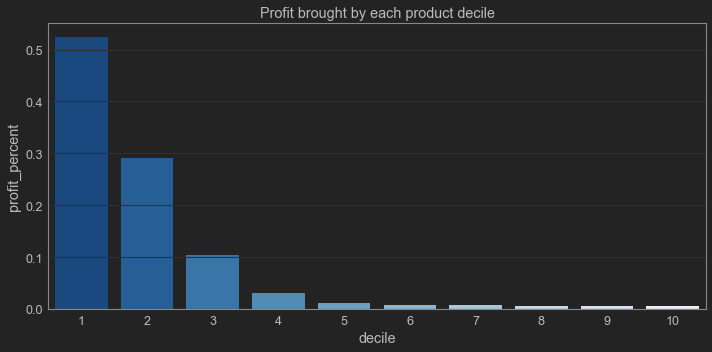

In [265]:
plt.figure(figsize = (10,5))
sns.barplot(x = "decile", y = "profit_percent", data = grp_product_profit, order = range(1, 11), palette = 'Blues_r')
plt.title("Profit brought by each product decile")
plt.tight_layout()

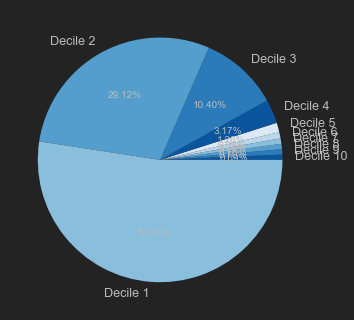

In [266]:
plt.figure(figsize = (5,5))
plt.pie(grp_product_profit['profit_percent'], autopct='%.2f%%', colors = sns.color_palette('Blues_r'), labels = [f"Decile {d}" for d in grp_product_profit['decile']])
#plt.legend()
plt.tight_layout()

## Gain

### On the previous example

In [267]:
grp_product_profit = grp_product_profit.sort_values("decile", ascending = False)

In [268]:
grp_product_profit["cumulative_gain"] = grp_product_profit['profit_percent'].cumsum()

In [269]:
grp_product_profit

,decile,profit_percent,cumulative_gain
9,1,0.524143,0.524143
8,2,0.291181,0.815324
7,3,0.103988,0.919312
6,4,0.031678,0.950990
5,5,0.012647,0.963637
4,6,0.008225,0.971862
3,7,0.007229,0.979091
2,8,0.007007,0.986097
1,9,0.006957,0.993054
0,10,0.006946,1.000000


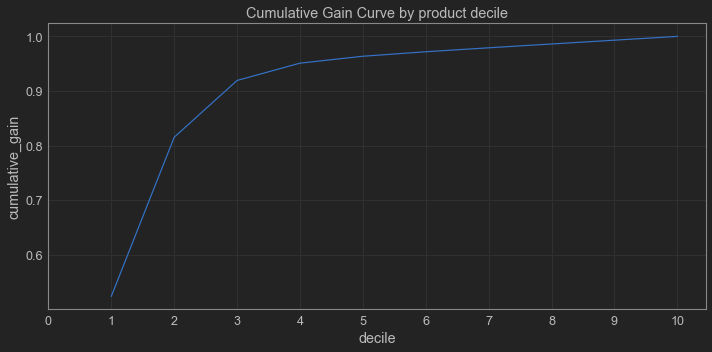

In [270]:
plt.figure(figsize = (10,5))
sns.lineplot(x = "decile", y = "cumulative_gain", data = grp_product_profit)
plt.xticks(range(11))
plt.title("Cumulative Gain Curve by product decile")
plt.tight_layout()

### Classifier application

In [271]:
def plot_gain(y_real, y_proba, ax = None, color = 'b', title = 'Gain Curve'):
    # Prepares the data
    aux_df = pd.DataFrame()
    aux_df['y_real'] = y_real
    aux_df['y_proba'] = y_proba
    # Sorts by predicted probability
    aux_df = aux_df.sort_values('y_proba', ascending = False)
    # Finds the total number of positive classes on the dataset
    total_positive_count = sum(aux_df['y_real'] == 1)
    # For each line of data, check if it is positive, add to the counter and calculate the gain
    gain = 0
    subset_positive_count = 0
    gain_values = []
    for i in aux_df.index:
        if aux_df.loc[i]['y_real'] == 1:
            subset_positive_count += 1
        gain = subset_positive_count / total_positive_count
        gain_values.append(gain)
    # Plots the gain curve
    if ax == None:
        ax = plt.axes()
    ax.set_xlabel('Proportion of sample')
    ax.set_ylabel('Gain')
    ax.set_title(title)
    sns.lineplot(x = [0, 1], y = [0,1], color = 'gray', linestyle = 'dashed', linewidth = 1, ax = ax)
    sns.lineplot(x = [x/len(gain_values) for x in range(len(gain_values))], y = gain_values, ax = ax, color = color)

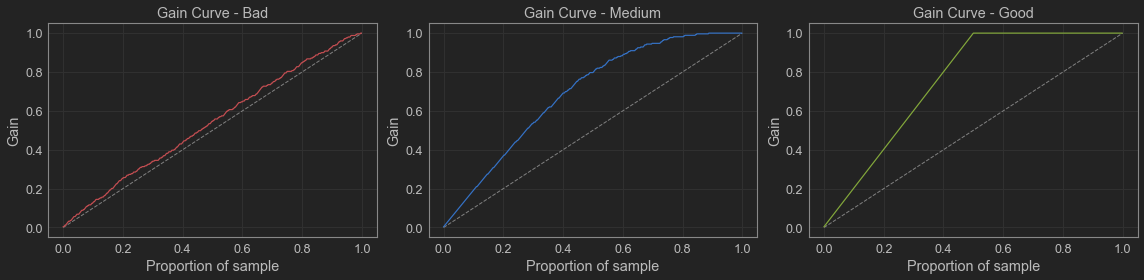

In [272]:
plt.figure(figsize = (16,4))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
plot_gain(y_bad_test, y_proba_bad[:, 1], ax = ax1, color = 'r', title = "Gain Curve - Bad")
plot_gain(y_medium_test, y_proba_medium[:, 1], ax = ax2, color = 'b', title = "Gain Curve - Medium")
plot_gain(y_good_test, y_proba_good[:, 1], ax = ax3, color = 'g', title = "Gain Curve - Good")
plt.tight_layout()